# **ECE471 - Homework #1**
**Philip Blumin**

# **Introduction**

This assignment explores different gdal functions, sentinal 2 data, and cloud masking algorthms. In the first task there is a bunch of corrupted tif files and I aligned them to the same resolution, coordinate reference system and spatial extent. In the second task these images were then analyzed by making a histogram, finding specific senerios (snowiest, cloudiest, etc), and various composite images.

All the files need are in the attached drive. There are seperate folders that contain all the unzipped tif files, the aligned tifs, and the tifs for task 2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


First, the cordinates of the given jsonFile were found. This was done exactly as in the class tutorial

In [ ]:
#from class
import json
import numpy as np
import matplotlib as plt
import numpy.ma as ma

jsonFile = '/content/drive/My Drive/ECE471/Homework1/santafe_crop.geojson'

with open(jsonFile, 'r') as file:
  jsonLoad = json.load(file)

geometry = jsonLoad['features'][0]['geometry']

In [ ]:
print(geometry)

{'type': 'Polygon', 'coordinates': [[[-106.07643127441406, 35.58417634369405], [-105.88554382324217, 35.58417634369405], [-105.88554382324217, 35.73982452242507], [-106.07643127441406, 35.73982452242507], [-106.07643127441406, 35.58417634369405]]]}


# **Preprocessing and Analyzing data**

Below each of the tif files in the folder were oppened using gdal and stored in a list

In [ ]:
#used assistance from this link: https://gis.stackexchange.com/questions/218338/running-script-over-every-file-in-folder-using-gdal-in-python
import os
from osgeo import gdal
unzipped = '/content/drive/My Drive/ECE471/Homework1/s2_santafe_unzipped/'

files = []
for path in os.listdir(unzipped):
    raster_dataset = gdal.Open(unzipped+path, gdal.GA_ReadOnly)
    #print(raster_dataset)
    files.append(raster_dataset)

In [ ]:
print(files)

[<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7fa84434afc0> >, <osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7fa8442c32a0> >, <osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7fa82c910270> >, <osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7fa82c910240> >, <osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7fa82c910210> >, <osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7fa82c9102a0> >, <osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7fa82c9102d0> >, <osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7fa82c910300> >, <osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7fa82c910330> >, <osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7fa82c910360> >, <osgeo.gdal.Dataset; proxy of <Swig Object of typ

Just out of curiosity I decided to take a look at some of the data from two of the images just to see how they differ in resolution, coordinate reference system, and spatial extent.

The code below is taken from the following tutorial: https://gdal.org/tutorials/raster_api_tut.html

In [ ]:
dataset = files[0]
print("Driver: {}/{}".format(dataset.GetDriver().ShortName,
                            dataset.GetDriver().LongName))
print("Size is {} x {} x {}".format(dataset.RasterXSize,
                                    dataset.RasterYSize,
                                    dataset.RasterCount))
print("Projection is {}".format(dataset.GetProjection()))
geotransform = dataset.GetGeoTransform()
if geotransform:
    print("Origin = ({}, {})".format(geotransform[0], geotransform[3]))
    print("Pixel Size = ({}, {})".format(geotransform[1], geotransform[5]))

Driver: GTiff/GeoTIFF
Size is 1696 x 1694 x 7
Projection is PROJCS["WGS 84 / UTM zone 13N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-105],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32613"]]
Origin = (400458.3073709665, 3957912.976506725)
Pixel Size = (12.775827320815647, -12.775827320815647)


In [ ]:
dataset = files[2]
print("Driver: {}/{}".format(dataset.GetDriver().ShortName,
                            dataset.GetDriver().LongName))
print("Size is {} x {} x {}".format(dataset.RasterXSize,
                                    dataset.RasterYSize,
                                    dataset.RasterCount))
print("Projection is {}".format(dataset.GetProjection()))
geotransform = dataset.GetGeoTransform()
if geotransform:
    print("Origin = ({}, {})".format(geotransform[0], geotransform[3]))
    print("Pixel Size = ({}, {})".format(geotransform[1], geotransform[5]))

Driver: GTiff/GeoTIFF
Size is 1256 x 1254 x 7
Projection is PROJCS["WGS 84 / UTM zone 13N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-105],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32613"]]
Origin = (400460.2989107586, 3957910.2293328308)
Pixel Size = (17.255269687640407, -17.255269687640407)


# **Task 1 - Align the dataset**



Gdal Warp was used in order to get all the images to have the same resoltion, spatial extent, and coordinate reference system. The coordinate reference used was UTM (ESPG:4326). 

In [ ]:
#ds = files[0]
folderLocation = '/content/drive/My Drive/ECE471/Homework1/ReprojectedTifs/'

croppedList = []
xmin = geometry['coordinates'][0][0][0]
ymin = geometry['coordinates'][0][0][1]
xmax = geometry['coordinates'][0][1][0]
ymax = geometry['coordinates'][0][2][1]
for i in range (0, len(files)):
  ds = files[i]
  location = folderLocation + 'ReprojectedFile_' + str(i+1) + '.tif'
  #dsCropped = gdal.Warp(location, ds, dstSRS = "EPSG:4326",outputBounds = geometry['coordinates'][0]) #same bounds and EPSG
  
  #dsRes = gdal.Warp(location, dsCropped, xRes = 10, yRes = 10) #same res

  dsReprj = gdal.Warp(location, ds, dstSRS = "EPSG:4326", outputBounds = (xmin, ymin, xmax, ymax)) #same bounds and EPSG

  #dsReprj = gdal.Warp(location, dsRes, dstSRS = "EPSG:4326", outputBounds = geometry['coordinates'][0])

  croppedList.append(dsReprj)


Next, in order to ensure the same resolution I got resolution the max xres and yres (max negative) from all the cropped files. Then gdal warp was used with these resolutions.

In [ ]:
maxResX = 0.0
maxResY = 0.0

for i in range(0, len(croppedList)):
  ds = croppedList[i]
  geotransform = ds.GetGeoTransform()
  
  xRes = geotransform[1]
  yRes = geotransform[5]

  if xRes > maxResX:
    maxResX = xRes
  
  if yRes < maxResY:
    maxResY = yRes

print("Max X resolution from cropped files: ", maxResX)
print("Max y resolution from cropped files: ", maxResY)

Max X resolution from cropped files:  0.00020072287189473102
Max y resolution from cropped files:  -0.0002005775499111088


In [ ]:
repojectedList = []
for i in range(0, len(croppedList)):
  ds = croppedList[i]
  location = folderLocation + 'ReprojectedFile_' + str(i+1) + '.tif'

  dsRes = gdal.Warp(location, ds, xRes = maxResX, yRes = maxResY) #same res

  repojectedList.append(dsRes)

In [ ]:
repojectedList

[<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7fa82c69cc30> >,
 <osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7fa82c69cd50> >,
 <osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7fa82c69cfc0> >,
 <osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7fa82c69cf90> >,
 <osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7fa82c69cf60> >,
 <osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7fa82c69cf30> >,
 <osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7fa82c6a3060> >,
 <osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7fa82c6a3090> >,
 <osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7fa82c6a30c0> >,
 <osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7fa82c6a30f0> >,
 <osgeo.gdal.Dataset; proxy of <Swig Obj

Just to check if gdal warp worked, I looked what each of first band images looked like. 

In [ ]:
import matplotlib.pyplot as plt
for i in range (0, len(repojectedList)):
  dsTest = repojectedList[i]
  array = dsTest.GetRasterBand(6).ReadAsArray()
  print("currently at i: ", i)
  plt.figure()
  plt.imshow(array, cmap='gist_earth')
  plt.colorbar()
  plt.show()


Output hidden; open in https://colab.research.google.com to view.

As seen above some of the images appear to be cut off so I decided to filter out these images

In [ ]:
unwanted = [0, 5, 22, 47, 59, 68, 75, 84, 89, 94, 96, 101] 
  
for ele in sorted(unwanted, reverse = True):  
    del repojectedList[ele] 


In [ ]:
for i in range(0, len(repojectedList)):
  ds = repojectedList[i]
  array = ds.GetRasterBand(1).ReadAsArray()
  print(array.shape)

(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)
(776, 951)


# **Task 2 - Analyze the dataset**

**Histrogram**

Below is the histogram accross the temporal stack. This compares the number of pixels per each band with their values. Paul helped me with this part as I had a little trouble figuring out exactly how to create this histogram.

As seen by the figure the blue, green, and red bands have alot of pixels at lower values. Meanwhile, swir1 and swir2 had pixels of higher value on average.

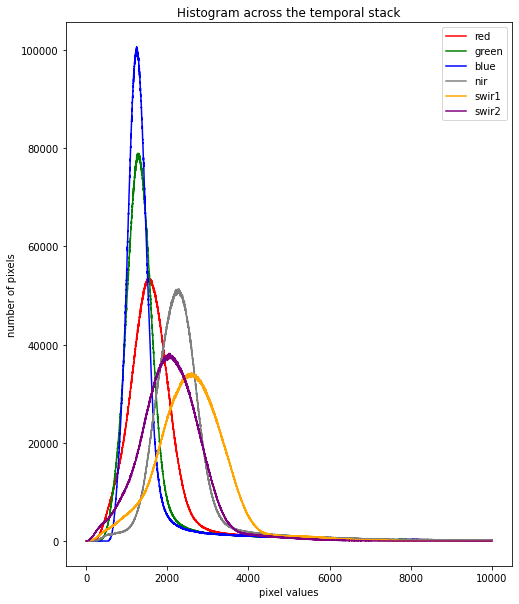

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#NOTE TO SAY PAUL HELPED WITH HISTOGRAM CAUSE CODE LOOKS SIMILAR
bands = ('red', 'green', 'blue', 'nir', 'swir1', 'swir2')
ids = (1, 2, 3, 4, 5, 6)
colors = ('r', 'g', 'b', 'grey', 'orange', 'purple')

plt.figure(figsize=(8,6))
arraysPerBand = []
for i, c in zip(ids, colors):
  for j in range(0, len(repojectedList)):
    ds = repojectedList[j]
    array = ds.GetRasterBand(i).ReadAsArray()
    arraysPerBand.append(array)

  arraysPerBand = np.array(arraysPerBand)

  hist, edges = np.histogram(arraysPerBand[:], bins = 10000, range=(0, 10000))

  plt.plot(edges[0:-1], hist, color = c, label = bands[i-1])
  arraysPerBand = []

plt.title('Histogram across the temporal stack')
plt.xlabel('pixel values')
plt.ylabel('number of pixels')
plt.legend()
plt.show()


**Cloud Masking**

For the cloud masking algorthm after playing around with many different options I decided to go with the method of getting the range of pixels values in which clouds are classified and then setting those to the pixels of a cloudless image. Before apply this method there were a few things needed to be done. First, I went through all the images above and noted the ones that had clouds in them. In the algorthm I ingnore all the cloudless images. Then for each different band I got the range of the pixel values in which I saw clouds. Note that I am slightly color blind so the ranges might not be perfect, which would slightly effect the results. In the algorthm I also get a matrix with only 1s and 0s depending on if a pixel has a cloud. This helped me visual how good my results are. 

In [ ]:
def cloudMasking(n, band):
  ds = repojectedList[n]
  dsCloudless = repojectedList[86]
  hasClouds = [3,11,16,17,18,23,26,29,32,38,44,46,47,49,50,51,62,63,65,66,69,77,84,89]

  if n not in hasClouds: 
    array2 = ds.GetRasterBand(band).ReadAsArray()
    blackWhite = np.zeros((776, 951))
  else:
    if band == 1:
      LB = 4000
      UB = 20000
    elif band == 2:
      LB = 4000
      UB = 20000
    elif  band == 3:
      LB = 5000
      UB = 20000
    elif band == 4:
      LB = 6000
      UB = 20000
    elif band == 5:
      LB = 6500
      UB = 20000
    elif band == 6:
      LB = 5000
      UB = 20000

    array = ds.GetRasterBand(band).ReadAsArray()
    array2 = ds.GetRasterBand(band).ReadAsArray()
    cloudlessArray = dsCloudless.GetRasterBand(band).ReadAsArray()

    #meanValue = np.mean(array2)

    blackWhite = array
    for i in range(0, 776):
      for j in range(0, 951):
        if (array[i][j] > LB) and (array[i][j] < UB) :
          blackWhite[i][j] = 1
          array2[i][j] = cloudlessArray[i][j]
        else:
          blackWhite[i][j] = 0
      
  return blackWhite, array2
    # plt.imshow(array, cmap='binary')
    # plt.colorbar()
    # plt.show()
    
    #allArrays.append(array2)
  

Before using the cloud masking algorthm I tested to see how good it was with the binary color map.

In [ ]:
for i in range(0, len(repojectedList)):
  blackWhite2, NIRBand = cloudMasking(i, 6)
  print("currently at i: ", i)
  plt.imshow(blackWhite2, cmap='binary')
  plt.colorbar()
  plt.show()



Output hidden; open in https://colab.research.google.com to view.

As seen from the results the algorthm is more or less pretty good at capturing the clouds. There are a few specticals that recieved a 1 which may effect the results slightly.

**Greenest Scene**

In order to figure out the most vegetated the formula used was NDVI = red - nir/red - nir. The red band is 1 and the nir band is 4. First the cloud masking algorthm was applied to bands 1 and 4. Then, a loop was ran through all the different mean NDVI values for each of the scene bands and the max was found.

In [ ]:
#NDVI = red - nir/red - nir
maxNDVI = 0
for i in range(0, len(repojectedList)):
  ds = repojectedList[i]
  blackWhite, redBand = cloudMasking(i, 1)
  redBandUnmasked = ds.GetRasterBand(1).ReadAsArray()
  redbandMasked = ma.array(redBandUnmasked, mask=blackWhite, fill_value=0)

  blackWhite2, NIRBand = cloudMasking(i, 4)
  NIRBandUnmasked = ds.GetRasterBand(4).ReadAsArray()
  NIRBandMasked = ma.array(NIRBandUnmasked, mask=blackWhite2,fill_value=0)
  
  NDVI = np.divide( np.mean(NIRBandMasked) - np.mean(redbandMasked), np.mean(NIRBandMasked) + np.mean(redbandMasked) )
  #NDVI = (np.mean(NIRBand) - np.mean(redBand)) / (np.mean(NIRBand) + np.mean(redBand))
  #NDVI[NDVI>1] = 1
  #meanNDVI = np.mean(NDVI,dtype=np.float64)
  meanNDVI = NDVI

  if meanNDVI > maxNDVI:
    maxNDVI = meanNDVI
    greenest = i

print(maxNDVI)
print(greenest)



0.22330942561853664
30


The snowiest scene ended up being an image taken july/August so the result makes sense.

Greenest Scene visualized

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7fa82c6a3570> >


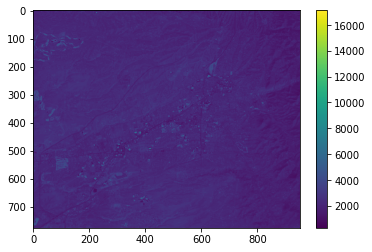

In [ ]:
dsGreenest = repojectedList[greenest]
print(dsGreenest)
array = dsGreenest.GetRasterBand(4).ReadAsArray()
plt.figure()
plt.imshow(array)
plt.colorbar()
plt.show()

In [ ]:
folderLocation = '/content/drive/My Drive/ECE471/Homework1/Task2Tifs/'
location = folderLocation + 'greenest30.tif'

test = gdal.Warp(location, dsGreenest)

**Snowiest Scene**

A similar formula to the greenest scene was used to find the snowiest scene. For snow we look at max NDSI and the formula for NDSI is green - swir/green - swir, where the green band is number 2 and the swir band is number 6.

In [ ]:
#NDSI = green - swir/green - swir
maxNDSI = 0
for i in range(0, len(repojectedList)):
  ds = repojectedList[i]
  #greenBand = ds.GetRasterBand(2).ReadAsArray()
  blackWhite, greenBand = cloudMasking(i, 2)
  greenBandUnmasked = ds.GetRasterBand(2).ReadAsArray()
  greenBandMasked = ma.array(greenBandUnmasked, mask=blackWhite, fill_value=0)

  blackWhite2, SWIRBand = cloudMasking(i, 5)
  SWIRBandUnmasked = ds.GetRasterBand(5).ReadAsArray()
  SWIRBandMasked = ma.array(SWIRBandUnmasked, mask=blackWhite2, fill_value=0)

  #SWIRBand = ds.GetRasterBand(5).ReadAsArray()
  #NDSI = (greenBand - SWIRBand) / (greenBand + SWIRBand)
  NDSI = np.divide( np.mean(greenBandMasked) - np.mean(SWIRBandMasked), np.mean(greenBandMasked) + np.mean(SWIRBandMasked) )
  meanNDSI = NDSI
  #meanNDSI = np.mean(NDSI)

  if meanNDSI > maxNDSI:
    maxNDSI = meanNDSI
    snowiest = i

print(maxNDSI)
print(snowiest)

0.48359399196081043
6


The snowiest scene ended up being an image taken jan/feb so the result makes sense.

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7fa82c6a30c0> >


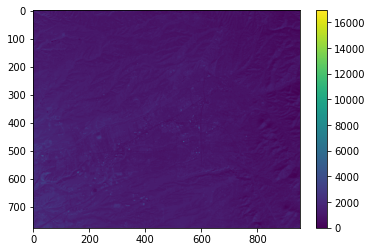

In [ ]:
dsSnowiest = repojectedList[snowiest]
print(dsSnowiest)
array = dsSnowiest.GetRasterBand(5).ReadAsArray()
plt.figure()
plt.imshow(array)
plt.colorbar()
plt.show()

In [ ]:
folderLocation = '/content/drive/My Drive/ECE471/Homework1/Task2Tifs/'
location = folderLocation + 'snowiest6.tif'

test = gdal.Warp(location, dsSnowiest)

**Cloudiest Scene**


Finding the cloudiest scene is fairly simple as the cloudmasking algorthm I have produces a matrix of 1s and 0s depending on which pixels have clouds. So cloud masking was done over the swir2 band and the sum of each blackWhite matrix was found. The one with the largest sum will be the cloudiest.

In [ ]:

maxClouds = 1
for i in range(0, len(repojectedList)):
  # ds = repojectedList[i]
  # band = ds.GetRasterBand(2)
  # if band.GetMinimum() is None or band.GetMaximum()is None:
  #   band.ComputeStatistics(1)
  #   #print("Statistics computed.")
  # mean = band.GetMetadata().get('STATISTICS_MEAN')
  # mean = float(mean)
  blackWhite, SWIR2Band = cloudMasking(i, 6)
  cloudSum = np.sum(blackWhite)
  if cloudSum > maxClouds:
    maxClouds = cloudSum
    cloudiest = i

print(maxClouds)
print(cloudiest)


235396
77


Cloudiest Scene visualized

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7fa82c6a3f30> >


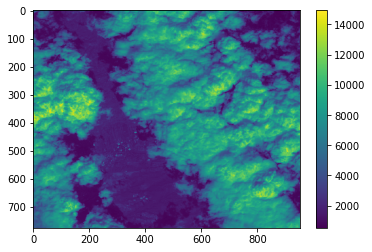

In [ ]:
dsCloudiest = repojectedList[cloudiest]
print(dsCloudiest)
array = dsCloudiest.GetRasterBand(2).ReadAsArray()
plt.figure()
plt.imshow(array)
plt.colorbar()
plt.show()

In [ ]:
folderLocation = '/content/drive/My Drive/ECE471/Homework1/Task2Tifs/'
location = folderLocation + 'cloudiest.tif'

test = gdal.Warp(location, dsCloudiest)

**Brightest Scene**


In [ ]:
#max RGB
maxRGB = 1
for i in range(0, len(repojectedList)):
  ds = repojectedList[i]
  #greenBand = ds.GetRasterBand(2).ReadAsArray()
  blackWhite, redBand = cloudMasking(i, 1)
  blackWhite2, greenBand = cloudMasking(i, 2)
  blackWhite3, blueBand = cloudMasking(i, 3)
  #SWIRBand = ds.GetRasterBand(5).ReadAsArray()
  RGB = redBand + greenBand + blueBand
  
  meanRGB = np.mean(RGB)

  if meanRGB > maxRGB:
    maxRGB = meanRGB
    brightest = i

print(maxRGB)
print(brightest)

10255.359626871335
6


The brightest scene ended up being the same one as the snowiest, which makes sense since light reflects of the snow.

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7fa82c6a30c0> >


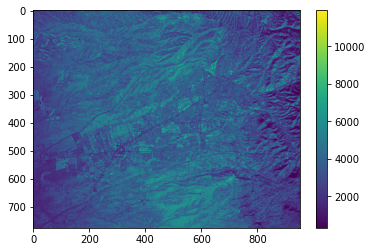

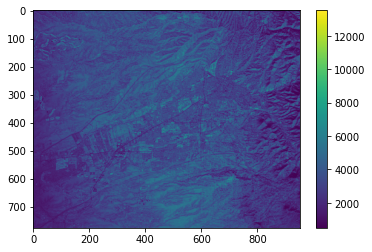

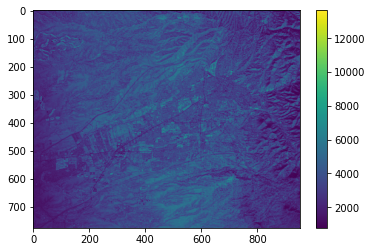

In [ ]:
dsBrightest = repojectedList[brightest]
print(dsBrightest)
for i in range(1,4):
  array = dsBrightest.GetRasterBand(i).ReadAsArray()
  plt.figure()
  plt.imshow(array)
  plt.colorbar()
  plt.show()

In [ ]:
folderLocation = '/content/drive/My Drive/ECE471/Homework1/Task2Tifs/'
location = folderLocation + 'brightest.tif'

test = gdal.Warp(location, dsBrightest)
print(test)

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7fa8223a4f00> >


**Mean Composite Image**

In order to find the mean composite image a function was writen to find the mean for each band. In this function the cloud masking algorthm was applied to each band. Each resulting array was added and divided by the total number of images. This function was applied to every band and each resulting array was stacked using np.dstack and converted to a geotiff files.

In [ ]:
def getMean(band):
  meanArray = np.zeros((776, 951))
  
  for n in range(0, len(repojectedList)):
    blackWhite, maskedArray = cloudMasking(n, band)
    meanArray += maskedArray

  meanArray = meanArray/(len(repojectedList))

  return meanArray

In [ ]:
# band 1 - red
# band 2 - green
# band 3 - blue
# band 4 - NIR
# band 5 - SWIR1
# band 6 - SWIR2

redMean = getMean(1)
greenMean = getMean(2)
blueMean = getMean(3)
nirMean = getMean(4)
swir1Mean = getMean(5)
swir2Mean = getMean(6)

In [ ]:
meanStack = np.dstack((redMean,greenMean,blueMean,nirMean,swir1Mean,swir2Mean))


In [ ]:
w = 776
h = 951
drv = gdal.GetDriverByName("GTiff")
folderLocation = '/content/drive/My Drive/ECE471/Homework1/Task2Tifs/'
location = folderLocation + 'meanComposite.tif'
ds = drv.Create(location, h, w, 6, gdal.GDT_Float64)

ds.GetRasterBand(1).WriteArray(redMean)
ds.GetRasterBand(2).WriteArray(greenMean)
ds.GetRasterBand(3).WriteArray(blueMean)
ds.GetRasterBand(4).WriteArray(nirMean)
ds.GetRasterBand(5).WriteArray(swir1Mean)
ds.GetRasterBand(6).WriteArray(swir2Mean)


#test = gdal.Warp(location, ds)
print(ds)

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7fa82a49c930> >


**Min Composite Image**

The min composite was done in a similar manner as the mean composite. In order to find the min each individual matrix was compared and them np.mininum function was used.

In [ ]:
def getMin(band):
  minArray = np.ones((776, 951))
  minArray = 100000*minArray
  for n in range(0, len(repojectedList)):
    blackWhite, maskedArray1 = cloudMasking(n, band)

    minArray = np.minimum(minArray, maskedArray1)

  return minArray

In [ ]:
redMin = getMin(1)
greenMin = getMin(2)
blueMin = getMin(3)
nirMin = getMin(4)
swir1Min = getMin(5)
swir2Min = getMin(6)

In [ ]:
minStack = np.dstack((redMin,greenMin,blueMin,nirMin,swir1Min,swir2Min))

In [ ]:
w = 776
h = 951
drv = gdal.GetDriverByName("GTiff")
folderLocation = '/content/drive/My Drive/ECE471/Homework1/Task2Tifs/'
location = folderLocation + 'minComposite.tif'
ds = drv.Create(location, h, w, 6, gdal.GDT_Float64)

ds.GetRasterBand(1).WriteArray(redMin)
ds.GetRasterBand(2).WriteArray(greenMin)
ds.GetRasterBand(3).WriteArray(blueMin)
ds.GetRasterBand(4).WriteArray(nirMin)
ds.GetRasterBand(5).WriteArray(swir1Min)
ds.GetRasterBand(6).WriteArray(swir2Min)


#test = gdal.Warp(location, ds)

0

**Max Composite Image**

The max composite was done exactly like the min composite

In [ ]:
def getMax(band):
  maxArray = np.zeros((776, 951))
  for n in range(0, len(repojectedList)):
    blackWhite, maskedArray1 = cloudMasking(n, band)

    maxArray = np.maximum(maxArray, maskedArray1)

  return maxArray

In [ ]:
redMax = getMax(1)
greenMax = getMax(2)
blueMax = getMax(3)
nirMax = getMax(4)
swir1Max = getMax(5)
swir2Max = getMax(6)

In [ ]:
maxStack = np.dstack((redMax,greenMax,blueMax,nirMax,swir1Max,swir2Max))

In [ ]:
w = 776
h = 951
folderLocation = '/content/drive/My Drive/ECE471/Homework1/Task2Tifs/'
location = folderLocation + 'maxComposite.tif'
drv = gdal.GetDriverByName("GTiff")
ds = drv.Create(location, h, w, 6, gdal.GDT_Float64)

ds.GetRasterBand(1).WriteArray(redMax)
ds.GetRasterBand(2).WriteArray(greenMax)
ds.GetRasterBand(3).WriteArray(blueMax)
ds.GetRasterBand(4).WriteArray(nirMax)
ds.GetRasterBand(5).WriteArray(swir1Max)
ds.GetRasterBand(6).WriteArray(swir2Max)


#test = gdal.Warp(location, ds)

0

**Median Composite Image**

In order to find the median composite again a function that takes in a band was created. Then all the arrays from getRasterBand were put into one array. This allowed me to simple use np.median on this 3d array to get the median values for each pixel

In [ ]:
#https://stackoverflow.com/questions/9967057/element-wise-median-and-percentiles-of-arrays-with-numeric-python

def getMedian(band):
  
  arrays = []
  for i in range(0, len(repojectedList)):
    blackWhite, maskedArray = cloudMasking(i, band)
    #ds = repojectedList[i]
    #tempArray = ds.GetRasterBand(band).ReadAsArray()
    arrays.append(maskedArray)
  
  arrays = np.array(arrays)

  medianArray = np.median(arrays, axis=0)

  #medianArray = sortedArrays[int(len(sortedArrays)*0.5)]

  return medianArray

In [ ]:
redMedian = getMedian(1)
greenMedian = getMedian(2)
blueMedian = getMedian(3)
nirMedian = getMedian(4)
swir1Median = getMedian(5)
swir2Median = getMedian(6)

In [ ]:
medianStack = np.dstack((redMedian,greenMedian,blueMedian, nirMedian,swir1Median,swir2Median))

In [ ]:
w = 776
h = 951
folderLocation = '/content/drive/My Drive/ECE471/Homework1/Task2Tifs/'
location = folderLocation + 'medianComposite.tif'
drv = gdal.GetDriverByName("GTiff")
ds = drv.Create(location, h, w, 6, gdal.GDT_Float64)

ds.GetRasterBand(1).WriteArray(redMedian)
ds.GetRasterBand(2).WriteArray(greenMedian)
ds.GetRasterBand(3).WriteArray(blueMedian)
ds.GetRasterBand(4).WriteArray(nirMedian)
ds.GetRasterBand(5).WriteArray(swir1Median)
ds.GetRasterBand(6).WriteArray(swir2Median)

#test = gdal.Warp(location, ds)

0

**Greenest Pixel Composite Image**

In order to get the greenest pixel first NDVI for each image was calculated in the same manner as before. Each NDVI matrix was appended into one array.Then np.argmax was applid on this array and this resulted in all the indicies for each pixel. This told me for every pixel which image had the max NDVI. 

In [ ]:
def getGreenest():
  arrays = []
  #maxNDVI = np.zeros((776, 951))
  for n in range(0, len(repojectedList)):
    blackWhite, redBand = cloudMasking(i, 1)
    blackWhite2, NIRBand = cloudMasking(i, 4)
    NDVI = (NIRBand - redBand) / (NIRBand + redBand)

    arrays.append(NDVI)
  
  arrays = np.array(arrays)

  maxNDVI = np.argmax(arrays, axis=0)
  
  #maxNDVI = np.maximum(maxNDVI, NDVI)

  return maxNDVI

In [ ]:
greenestIndices = getGreenest()

The method below is extremely inefficent and takes like 45 min to run. There is probably something much better I could have done I could not think of it

In [ ]:
greenestRed = np.zeros((776, 951))
greenestGreen = np.zeros((776, 951))
greenestBlue = np.zeros((776, 951))
greenestNIR = np.zeros((776, 951))
greenestSwir1 = np.zeros((776, 951))
greenestSwir2 = np.zeros((776, 951))

for i in range(0, 776):
  for j in range(0, 951):
    image = greenestIndices[i][j]
    ds = repojectedList[image]
    
    redBand = ds.GetRasterBand(1).ReadAsArray()
    greenestRed[i][j] = redBand[i][j]

    greenBand = ds.GetRasterBand(2).ReadAsArray()
    greenestGreen[i][j] = greenBand[i][j] 

    blueBand = ds.GetRasterBand(3).ReadAsArray()
    greenestBlue[i][j] = blueBand[i][j] 

    NIRBand = ds.GetRasterBand(4).ReadAsArray()
    greenestNIR[i][j] = NIRBand[i][j] 

    swir1Band = ds.GetRasterBand(5).ReadAsArray()
    greenestSwir1[i][j] = swir1Band[i][j] 

    swir2Band = ds.GetRasterBand(6).ReadAsArray()
    greenestSwir2[i][j] = swir2Band[i][j] 
  print("done: ", i) 

done:  0
done:  1
done:  2
done:  3
done:  4
done:  5
done:  6
done:  7
done:  8
done:  9
done:  10
done:  11
done:  12
done:  13
done:  14
done:  15
done:  16
done:  17
done:  18
done:  19
done:  20
done:  21
done:  22
done:  23
done:  24
done:  25
done:  26
done:  27
done:  28
done:  29
done:  30
done:  31
done:  32
done:  33
done:  34
done:  35
done:  36
done:  37
done:  38
done:  39
done:  40
done:  41
done:  42
done:  43
done:  44
done:  45
done:  46
done:  47
done:  48
done:  49
done:  50
done:  51
done:  52
done:  53
done:  54
done:  55
done:  56
done:  57
done:  58
done:  59
done:  60
done:  61
done:  62
done:  63
done:  64
done:  65
done:  66
done:  67
done:  68
done:  69
done:  70
done:  71
done:  72
done:  73
done:  74
done:  75
done:  76
done:  77
done:  78
done:  79
done:  80
done:  81
done:  82
done:  83
done:  84
done:  85
done:  86
done:  87
done:  88
done:  89
done:  90
done:  91
done:  92
done:  93
done:  94
done:  95
done:  96
done:  97
done:  98
done:  99
done:  100

In [ ]:
w = 776
h = 951
drv = gdal.GetDriverByName("GTiff")
folderLocation = '/content/drive/My Drive/ECE471/Homework1/Task2Tifs/'
location = folderLocation + 'greenestComposite.tif'
ds = drv.Create(location, h, w, 6, gdal.GDT_Float64)

ds.GetRasterBand(1).WriteArray(greenestRed)
ds.GetRasterBand(2).WriteArray(greenestGreen)
ds.GetRasterBand(3).WriteArray(greenestBlue)
ds.GetRasterBand(4).WriteArray(greenestNIR)
ds.GetRasterBand(5).WriteArray(greenestSwir1)
ds.GetRasterBand(6).WriteArray(greenestSwir2)


0

**85% Greenest Pixel Composite Image**

To calculate the 85th percentile for all the NDVIs was done in a bit complicated way. The 85th percentile index was found based on the length of the list. Then the argpartition function was used to find the indicies. The way the indicies were used to get the composite is done exactly the same way as the greenest was. Again this is extremely inefficient and took quit a while to run. At the very end of this section you can see a quick example of how the 85th percentile indices were found.

In [ ]:
#https://stackoverflow.com/questions/26070514/how-do-i-get-the-index-of-a-specific-percentile-in-numpy-scipy
def getGreenest85():
  
  #maxNDVI = np.zeros((776, 951))
  arrays = []
  for n in range(0, len(repojectedList)):
    blackWhite, redBand = cloudMasking(n, 1)
    blackWhite2, NIRBand = cloudMasking(n, 4)
    NDVI = (NIRBand - redBand) / (NIRBand + redBand)
    arrays.append(NDVI)
  
  #greenest85th = np.percentile(arrays, 85, axis=0)
  idx = 0.50 * (len(arrays) - 1)
  idx = int(idx + 0.5)
  greenest85th = np.argpartition(arrays, idx, axis=0)[idx]


  return greenest85th

In [ ]:
greenestIndices85 = getGreenest85()

In [ ]:
greenest85Red = np.zeros((776, 951))
greenest85Green = np.zeros((776, 951))
greenest85Blue = np.zeros((776, 951))
greenest85NIR = np.zeros((776, 951))
greenest85Swir1 = np.zeros((776, 951))
greenest85Swir2 = np.zeros((776, 951))

for i in range(0, 776):
  for j in range(0, 951):
    image = greenestIndices85[i][j]
    ds = repojectedList[image]
    
    redBand = ds.GetRasterBand(1).ReadAsArray()
    greenest85Red[i][j] = redBand[i][j]

    greenBand = ds.GetRasterBand(2).ReadAsArray()
    greenest85Green[i][j] = greenBand[i][j] 

    blueBand = ds.GetRasterBand(3).ReadAsArray()
    greenest85Blue[i][j] = blueBand[i][j] 

    NIRBand = ds.GetRasterBand(4).ReadAsArray()
    greenest85NIR[i][j] = NIRBand[i][j] 

    swir1Band = ds.GetRasterBand(5).ReadAsArray()
    greenest85Swir1[i][j] = swir1Band[i][j] 

    swir2Band = ds.GetRasterBand(6).ReadAsArray()
    greenest85Swir2[i][j] = swir2Band[i][j] 
  print("done: ", i) 

done:  0
done:  1
done:  2
done:  3
done:  4
done:  5
done:  6
done:  7
done:  8
done:  9
done:  10
done:  11
done:  12
done:  13
done:  14
done:  15
done:  16
done:  17
done:  18
done:  19
done:  20
done:  21
done:  22
done:  23
done:  24
done:  25
done:  26
done:  27
done:  28
done:  29
done:  30
done:  31
done:  32
done:  33
done:  34
done:  35
done:  36
done:  37
done:  38
done:  39
done:  40
done:  41
done:  42
done:  43
done:  44
done:  45
done:  46
done:  47
done:  48
done:  49
done:  50
done:  51
done:  52
done:  53
done:  54
done:  55
done:  56
done:  57
done:  58
done:  59
done:  60
done:  61
done:  62
done:  63
done:  64
done:  65
done:  66
done:  67
done:  68
done:  69
done:  70
done:  71
done:  72
done:  73
done:  74
done:  75
done:  76
done:  77
done:  78
done:  79
done:  80
done:  81
done:  82
done:  83
done:  84
done:  85
done:  86
done:  87
done:  88
done:  89
done:  90
done:  91
done:  92
done:  93
done:  94
done:  95
done:  96
done:  97
done:  98
done:  99
done:  100

In [ ]:
w = 776
h = 951
drv = gdal.GetDriverByName("GTiff")
folderLocation = '/content/drive/My Drive/ECE471/Homework1/Task2Tifs/'
location = folderLocation + 'greenest85Composite.tif'
ds = drv.Create(location, h, w, 6, gdal.GDT_Float64)

ds.GetRasterBand(1).WriteArray(greenest85Red)
ds.GetRasterBand(2).WriteArray(greenest85Green)
ds.GetRasterBand(3).WriteArray(greenest85Blue)
ds.GetRasterBand(4).WriteArray(greenest85NIR)
ds.GetRasterBand(5).WriteArray(greenest85Swir1)
ds.GetRasterBand(6).WriteArray(greenest85Swir2)

0

example of how I got the 85th percentile indicies.

In [ ]:
#demo of the above working
a=np.array(([1,2,3],[4,5,6],[7,8,9]))
b=np.array(([9,8,7],[6,5,4],[3,2,1]))
c=np.array(([5,9,1],[5,4,7],[5,2,3]))

d = np.array([a, b, c])
print(d)
print('\n')
idx = 0.50 * (len(d) - 1)
idx = int(idx + 0.5)
print(np.argpartition(d, idx, axis=0)[idx])


[[[1 2 3]
  [4 5 6]
  [7 8 9]]

 [[9 8 7]
  [6 5 4]
  [3 2 1]]

 [[5 9 1]
  [5 4 7]
  [5 2 3]]]


[[2 1 0]
 [2 1 0]
 [2 2 2]]


# **Conclusion**

Alot was learned from this assignment about gdal functions, sentinal2, cloud masking, and geotiff files. The assignment was quit challenging and I did use up more time then I wanted with the first task (alining the data). I ran into many issues with gdal, but eventually figured out how to debug them and was on my way to task 2. The second task was also pretty challenging and made me think alot about how to write the various algorthms. My algorthms were definitly not the best and could have been more efficent. One thing I wish I had used more for this assignments were masked arrays. I did fully understand their power until it was a bit too late, but masked arrays definitly would have made my cloud masking algorthm better and more efficent. The images for the greenest, snowiest, cloudies, and brightest seem to look good and make sense based on when they were taken. However, I could not really get the chance to see my composite images as they were not loading too well in my tif file viewer. I did check the contents of each of them and it seemed like each of the bands of the composites had the values I wanted. Overall, this was a pretty fun yet challenging assignment that taught me alot about viewing data and the remote sensing field. 